In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import time
from scipy.stats import pearsonr

import os

# Computing pearson correlation

1. Modules or communities from EM drosophilia are first converted to adjacency matrix
2. Similarly, the reconstructed networks(prox range 1um and 5um) of nodes-grouped according to modules of EM are converted to adjacency matrix.

3. Finally pearson correlation is computed between these two adjacency matrices to determine the level of correlation.



In [ ]:
from scipy.stats import pearsonr


In [ ]:
pr=1

print("Proximity range: %d um"%pr)
print("Module \t pearson_corr \t p_val")

for j in range(8):

    nodes = pd.read_csv("./EM_communities/averageSubComm%d_drosophilia.csv"%j).Node.to_list()
    
    # EM network for Module j
    
    df = pd.read_csv("traced-total-connections.csv")
    nodeA_list = df.bodyId_pre.tolist()
    nodeB_list = df.bodyId_post.tolist()
    weight_list = df.weight.tolist()
    
    # creating an edge list from adjacency matrix
    edge_list=[]
    for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
        if (l in nodes) and (m in nodes):
            edge_list.append( (l,m,{"weight":w}))
    
    G_EM = nx.DiGraph()
    
    # Add all the nodes to the graph
    G_EM.add_nodes_from(nodes)
    # Add all the edges to the graph
    G_EM.add_edges_from(edge_list)
    
    mod_EM_adjacency = nx.adjacency_matrix(G_EM, nodelist=nodes, weight='weight')
    
    
    path = "./janelia_Comm%d/"%j
    
    df_network = pd.read_csv(path+"network_%.1fum.txt"%pr, sep="\t", header=None)
    df_network = df_network.rename(columns={0: "bodyId_pre", 1: "bodyId_post", 2:"weight"})
    
    nodeA_list = df_network.bodyId_pre.tolist()
    nodeB_list = df_network.bodyId_post.tolist()
    weight_list = df_network.weight.tolist()
    
    # creating an edge list from adjacency matrix
    edge_list=[]
    for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
        if (l in nodes) and (m in nodes):
            edge_list.append( (l,m,{"weight":w}))
        
    G_strah = nx.DiGraph()
    
    # Add all the nodes to the graph
    G_strah.add_nodes_from(nodes)
    # Add all the edges to the graph
    G_strah.add_edges_from(edge_list)
    mod_strah_adjacency = nx.adjacency_matrix(G_strah, nodelist=nodes, weight='weight')
    
    corr_info = pearsonr(mod_EM_adjacency.toarray().flatten(), mod_strah_adjacency.toarray().flatten())
    print("Module %d \t %.3f \t %.3f"%(j, corr_info.statistic, corr_info.pvalue))
    


In [ ]:
%%time
pr=5

print("Proximity range: %d um"%pr)
print("Module \t pearson_corr \t p_val")

for j in range(8):

    nodes = pd.read_csv("./EM_communities/averageSubComm%d_drosophilia.csv"%j).Node.to_list()
    
    # EM network for Module j
    
    df = pd.read_csv("traced-total-connections.csv")
    nodeA_list = df.bodyId_pre.tolist()
    nodeB_list = df.bodyId_post.tolist()
    weight_list = df.weight.tolist()
    
    # creating an edge list from adjacency matrix
    edge_list=[]
    for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
        if (l in nodes) and (m in nodes):
            edge_list.append( (l,m,{"weight":w}))
    
    G_EM = nx.DiGraph()
    
    # Add all the nodes to the graph
    G_EM.add_nodes_from(nodes)
    # Add all the edges to the graph
    G_EM.add_edges_from(edge_list)
    
    mod_EM_adjacency = nx.adjacency_matrix(G_EM, nodelist=nodes, weight='weight')
    
    
    path = "./janelia_Comm%d/"%j
    
    df_network = pd.read_csv(path+"network_%.1fum.txt"%pr, sep="\t", header=None)
    df_network = df_network.rename(columns={0: "bodyId_pre", 1: "bodyId_post", 2:"weight"})
    
    nodeA_list = df_network.bodyId_pre.tolist()
    nodeB_list = df_network.bodyId_post.tolist()
    weight_list = df_network.weight.tolist()
    
    # creating an edge list from adjacency matrix
    edge_list=[]
    for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
        if (l in nodes) and (m in nodes):
            edge_list.append( (l,m,{"weight":w}))
        
    G_strah = nx.DiGraph()
    
    # Add all the nodes to the graph
    G_strah.add_nodes_from(nodes)
    # Add all the edges to the graph
    G_strah.add_edges_from(edge_list)
    mod_strah_adjacency = nx.adjacency_matrix(G_strah, nodelist=nodes, weight='weight')
    
    corr_info = pearsonr(mod_EM_adjacency.toarray().flatten(), mod_strah_adjacency.toarray().flatten())
    print("Module %d \t %.3f \t %.3f"%(j, corr_info.statistic, corr_info.pvalue))
    


In [ ]:
%%time

# compute pearson correlation between overall ~21000 nodes network corresponding to EM drosophilia
# and 8 reconstructed networks(pr range 1um and 5um) grouped together to form large network ~21000 nodes.
# in the latter inter-community links do not exist because of the way of construction.
for pr in [1,5]:

    print("Proximity range: %d um"%pr)
    print("Overall pearson correlation")
    
    nodes=[]
    for j in range(8):
        
        nodes += pd.read_csv("./EM_communities/averageSubComm%d_drosophilia.csv"%j).Node.to_list()
        
    # EM network
    df = pd.read_csv("traced-total-connections.csv")
    nodeA_list = df.bodyId_pre.tolist()
    nodeB_list = df.bodyId_post.tolist()
    weight_list = df.weight.tolist()
    
    # creating an edge list from adjacency matrix
    edge_list=[]
    for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
        if (l in nodes) and (m in nodes):
            edge_list.append( (l,m,{"weight":w}))
    
    G_EM = nx.DiGraph()
    
    # Add all the nodes to the graph
    G_EM.add_nodes_from(nodes)
    # Add all the edges to the graph
    G_EM.add_edges_from(edge_list)
    
    mod_EM_adjacency = nx.adjacency_matrix(G_EM, nodelist=nodes, weight='weight')
        
    # Strahler network
    edge_list=[]
        
    for j in range(8):
        path = "./janelia_Comm%d/"%j
        
        df_network = pd.read_csv(path+"network_%.1fum.txt"%pr, sep="\t", header=None)
        df_network = df_network.rename(columns={0: "bodyId_pre", 1: "bodyId_post", 2:"weight"})
        
        nodeA_list = df_network.bodyId_pre.tolist()
        nodeB_list = df_network.bodyId_post.tolist()
        weight_list = df_network.weight.tolist()
        
        for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
            if (l in nodes) and (m in nodes):
                edge_list.append( (l,m,{"weight":w}))
            
    G_strah = nx.DiGraph()
    
    # Add all the nodes to the graph
    G_strah.add_nodes_from(nodes)
    # Add all the edges to the graph
    G_strah.add_edges_from(edge_list)
    mod_strah_adjacency = nx.adjacency_matrix(G_strah, nodelist=nodes, weight='weight')
        
    corr_info = pearsonr(mod_EM_adjacency.toarray().flatten(), mod_strah_adjacency.toarray().flatten())
    print("%.3f \t %.3f"%(corr_info.statistic, corr_info.pvalue))
    print("\n")
        


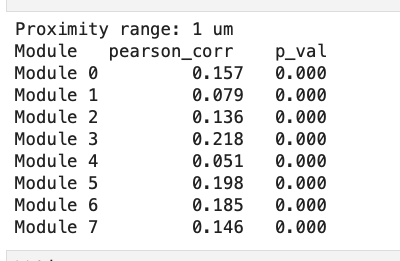

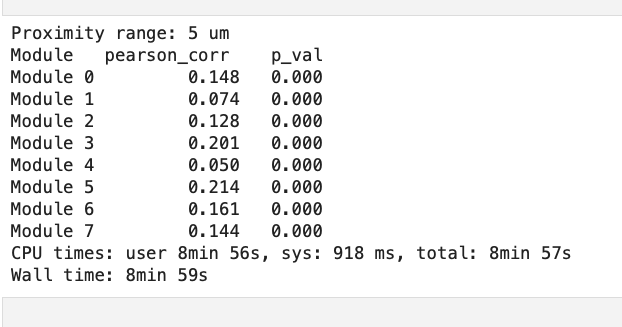

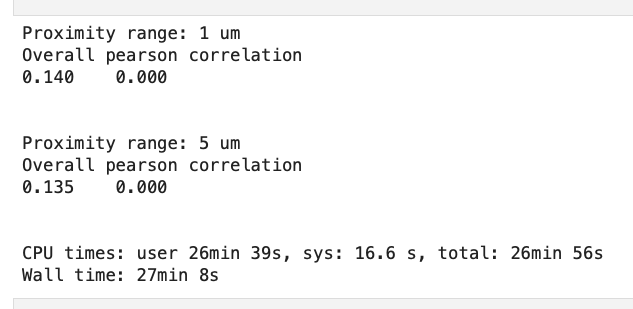

# Z score striplots

In [2]:
def constructGraph_EM(mod_num):
    
    nodes = pd.read_csv("./EM_communities/averageSubComm%d_drosophilia.csv"%mod_num).Node.to_list()
    
    # EM network for Module 
    
    df = pd.read_csv("traced-total-connections.csv")
    nodeA_list = df.bodyId_pre.tolist()
    nodeB_list = df.bodyId_post.tolist()
    weight_list = df.weight.tolist()
    
    # creating an edge list from adjacency matrix
    edge_list=[]
    for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
        if (l in nodes) and (m in nodes):
            edge_list.append( (l,m,{"weight":w}))
    
    G_EM = nx.DiGraph()
    
    # Add all the nodes to the graph
    G_EM.add_nodes_from(nodes)
    # Add all the edges to the graph
    G_EM.add_edges_from(edge_list)
    adjacency = nx.adjacency_matrix(G_EM, nodelist=nodes, weight='weight')
    
    return adjacency
    

In [3]:
def constructGraph_model(mod_num, pr):

    
    path = "./janelia_Comm%d/"%mod_num
    nodes = pd.read_csv("./EM_communities/averageSubComm%d_drosophilia.csv"%mod_num).Node.to_list()
    
    df_network = pd.read_csv(path+"network_%.1fum.txt"%pr, sep="\t", header=None)
    df_network = df_network.rename(columns={0: "bodyId_pre", 1: "bodyId_post", 2:"weight"})
    
    nodeA_list = df_network.bodyId_pre.tolist()
    nodeB_list = df_network.bodyId_post.tolist()
    weight_list = df_network.weight.tolist()
    
    # creating an edge list from adjacency matrix
    edge_list=[]
    for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
        if (l in nodes) and (m in nodes):
            edge_list.append( (l,m,{"weight":w}))
        
    G_strah = nx.DiGraph()
    
    # Add all the nodes to the graph
    G_strah.add_nodes_from(nodes)
    # Add all the edges to the graph
    G_strah.add_edges_from(edge_list)

    adjacency = nx.adjacency_matrix(G_strah, nodelist=nodes, weight='weight')
    
    return adjacency
    #return G_strah

In [4]:
def constructGraph_random(j, type, pr):

    # get random network as dataframe
    path = "./random network/janelia_Comm%d/%s/network_%.1fum/"%(j,type,pr)
    df_network = pd.read_csv(path+"%d.csv"%k)
    
    nodeA_list = df_network.bodyId_pre.tolist()
    nodeB_list = df_network.bodyId_post.tolist()
    weight_list = df_network.weight.tolist()
    
    nodes = pd.read_csv("./EM_communities/averageSubComm%d_drosophilia.csv"%j).Node.to_list()

    G = nx.DiGraph()
    
    # Add all the nodes to the graph
    G.add_nodes_from(nodes)
    
    # creating an edge list from adjacency matrix
    edge_list=[]
    for l,m,w in zip(nodeA_list, nodeB_list, weight_list):
        if (l in nodes) and (m in nodes):
            #edge_list.append( (l,m,w))
            G.add_edge(l, m, weight=w)
    
    adjacency = nx.adjacency_matrix(G, nodelist=nodes, weight='weight')
    return adjacency

In [25]:
%%time
# pearson correlation strip plots
pr=5
realizations=100

## choose link random or weight random for z score and stripplot
#type = "link random"
type  = "weight random"
print("prox range: %.1f um"%pr)
sim_network_dict = {"Module 6":[], "Module 8":[]}
    
for mod_num in [5,7]:
    #corresponds to comunity 6, 8
    
    
    # RANDOM NETWORKS
    # compute pearson correlation of the ARI/NMI of the null models itself.
    A_EM = constructGraph_EM(mod_num)
    
    for k in range(realizations):
        A_rand = constructGraph_random(mod_num, type, pr)
        corr_info = pearsonr(A_EM.toarray().flatten(), A_rand.toarray().flatten())
        
        sim_network_dict["Module %d"%(mod_num+1)].append(corr_info.statistic)
        
df = pd.DataFrame({"Modules":["Module 6"]*realizations+["Module 8"]*realizations,
                "pearson":sim_network_dict["Module 6"]+sim_network_dict["Module 8"]})



prox range: 5.0 um
CPU times: user 13min 56s, sys: 8.14 s, total: 14min 4s
Wall time: 14min 4s


In [26]:
# z-score null model pearson values
z_list = []
for mod_num in [5,7]:
    
    df_network = df[df["Modules"]=="Module %d"%(mod_num+1)]
    z_list+= list((df_network['pearson']-df_network['pearson'].mean())/df_network['pearson'].std())

df['z-score'] = z_list


In [27]:
##############  EMPIRICAL DATAFRAME/MODEL RECONSTRUCTED NETWORKS   ####################
emp_z_score_list = []
pval_list = []

for mod_num in [5,7]:
    A_EM = constructGraph_EM(mod_num)
    
    A_strah = constructGraph_model(mod_num, pr)

    corr_info = pearsonr(A_EM.toarray().flatten(), A_strah.toarray().flatten())
        
    res = corr_info.statistic
    
    df_network = df[df["Modules"]=="Module %d"%(mod_num+1)]
    val = df_network["pearson"]
    z_score_emp = (res-np.mean(val))/np.std(val)
    
    emp_z_score_list.append(z_score_emp)
    
    # determine p-value
    count = len(np.where(df_network["z-score"].to_numpy() > z_score_emp)[0])
    n_nulls = len(df_network)
    pval_list.append( count / n_nulls )



df_emp = pd.DataFrame( {"Modules":["Module 6", "Module 8"],
                      "z-score":emp_z_score_list,
                     "p-val":pval_list} )


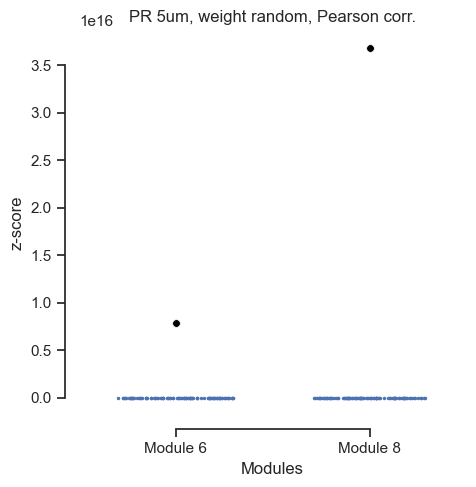

In [28]:
# visualising the z scores of our model(strahler-threshold-proximity based reconstructed network) 
# and randomised networks using striplots.

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# plot empirical vs null scores (z-scored) at critical alpha
sns.set(style="ticks", font_scale=1.0)
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)

sns.scatterplot(
    data=df_emp,
    x='Modules',
    y='z-score',
    s=30,
    c='black',
    ax=ax,
    
)
sns.stripplot(
    data=df,
    x='Modules',
    y='z-score',
    # width=0.5,
    s=2.5,
    jitter=0.3,
    ax=ax,
    
)
#ax.set_ylim(-3, 12.5)
sns.despine(offset=10, trim=True,
            top=True, bottom=False,
            right=True, left=False)

image_path = "./pearson_zscore_images/"
if not os.path.isdir(image_path):
    os.mkdir(image_path)


plt.title("PR %dum, %s, Pearson corr."%(pr,type), size=12)
    
plt.savefig(image_path+"PR_%dum_%s.pdf"%(pr,type),\
            facecolor="white", bbox_inches="tight", dpi=600 )